# Representação e Clusterização de documentos usando grafo direcionado


No que se diz respeito a problemas de mineração de texto, a clusterização de documentos é um problema que consiste em encontrar grupos de documentos, dado um coleção, com características semelhantes. No trabalho, usaremos uma coleção de documentos (`20 newsgroups`), onde cada documento dessa coleção será representado por vértice de um grafo, e neste será aplicado a técnica de clusterização `K-Means` utilizando `Dijkstra` para encontrar a distancia entre os vértices (documentos).

**Palavras-chave:** clusterização, documentos, k-means, dijkstra, grafo.

[Link para o trabalho acadêmico.](https://blogdozouza.files.wordpress.com/2020/09/graph_k-dijkstra4doc.pdf)
- Autores:
  - João Marcos ([Linkedin](https://www.linkedin.com/in/user1029010001901909109/))
  - Alex Souza ([Linkedin](https://www.linkedin.com/in/alex-souza/))

## Conceitos

### Coleta e Pré-Processamento

É umas das fases mais importantes e custosas do processo, é o alicerce para toda a análise que vem a seguir, ou seja, quanto mais tempo se investir nessas fases, menos tempo será gasto futuramente.

Para esse trabalho foi utilizado a coleção de documentos: 20 Newsgroups, é uma coleção em inglês, que contém 18.846 documentos que estão quase que uniformemente distribuídos
em 20 categorias distintas.
 - *exemplo*: `tecnologia`, `política`, `religião`, `esporte`, entre outras. Algumas dessas categorias estão intimamente relacionadas, enquanto outras não tem relação alguma com as outras.

#### Ferramentas
É utilizado a ferramenta de desenvolvimento Python na versão 3 e algumas bibliotecas específicas para texto, para cálculos matriciais, para representação em grafos, entre
outras. Podemos destacar:
1. `NTLK` (Natural Language Toolkit é um conjunto de ferramentas open source escritas em Python e para Python, para a manipulação de linguagem natural.)
2. `SKLearn` (É uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, K-Means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.)
3. `Numpy` (É um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas.)
4. `Networkx` (É uma biblioteca Python para estudo de grafos e redes)

#### Representação de documentos
Utilização de `TF-IDF`

A frequência de um termo (tf) é uma medida utilizada que considera o número de ocorrências do termo em um documento. O valor dos termos pode ser calculado também levando em consideração, além da frequência de um termo, o fator relacionado a frequência inversa do documento (idf) favorecendo termos que aparecem em poucos documentos de uma coleção.

E resultando em uma `Matriz de Adjacência`: Documento X Documento.

Explicada em detalhes no "artigo"

### Clusterização (Algoritmo - Não Supervisionado)
A solução desenvolvida busca encontrar grupos de documentos através de um algoritmo baseado no `K-Means`, utilizando o algoritmo de `Dijkstra` para encontrar o melhor caminho entre vértices (documentos).

#### K-Means
Os algoritmos de agrupamento de dados (clustering) reúnem um conjunto de objetos em subconjuntos ou clusters, que sejam coerentes internamente, mas claramente diferentes
uns dos outros. Desta maneira, os objetos de um mesmo cluster devem ser o mais parecidos possíveis, e objetos de um cluster devem ser tão diferentes quanto possível dos
documentos em outros clusters.

#### Dijkstra
O algoritmo de Dijkstra tem um conjunto de passos que permite encontrar um caminho de menor custo entre dois vértices de um grafo valorado. Não é, portanto, necessário que o caminho seja hamiltoniano, apesar de continuar sendo uma árvore. Há, dessa forma, sempre um vértice de início e um vértice final, conectados por diversos vértices intermediários.

### K-Dijkstra4Doc

O `K-Dijkstra4Doc` é o nome dado ao método usado neste trabalho para encontrar grupos em um grafo de documentos, baseado em `K-Means` e usando `Dijkstra` para encontrar o caminho mínimo entre vértices.

**Avaliação e Resultados**
O experimento realizado neste trabalho consistiu em avaliar o tempo de convergência do algoritmo em algumas variações (k documentos correlacionados, inicialização dos centroides), assim como uma análise das categorias definidas na coleção de documentos.

É usado 50 documentos de 3 categorias da coleção, definindo assim o número de k centroides. 
A `Tabela 1`, apresenta os resultados para a primeira estratégia de definição do centroide. A `Tabela 2`, apresenta os resultados da segunda estratégia. A coluna "Análise de categoria" apresenta o total de documentos agrupados corretamente de acordo com as categorias definidas na coleção. 

<p align="center"><img src="https://blogdozouza.files.wordpress.com/2020/09/t1.png"></p>

<p align="center"><img src="https://blogdozouza.files.wordpress.com/2020/09/t2.png"></p>

As `Figuras 4 e 5` apresentam um exemplo de um grafo extraído dos experimentos.

<p align="center"><img src="https://blogdozouza.files.wordpress.com/2020/09/img4.png"></p>

<p align="center"><img src="https://blogdozouza.files.wordpress.com/2020/09/img5.png"></p>

`Os resultados obtidos foram satisfatórios, uma vez que é um método não supervisionado, que encontra grupos de documentos de forma natural, levando em conta a correlação entre documentos.`

## Algoritmo e Resultados

Importando as bibliotecas utilizadas no projeto

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import operator
import numpy as np
import operator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

Classe para o método proposto **Kdijkstra**

In [ ]:
class Kdijkstra(object):

    def __init__(self, matrix, k, rep, op):
        self.G = nx.from_numpy_matrix(matrix)
        self.k_centers = k
        self.centroids = []
        self.centers = dict()
        self.rep = rep
        self.op = op

	# Pega todos nos de um center e calcula a distancia de cada vertice para todos os vertices desse center - pega o vertice em que 
	# a soma dos caminhos dele para todos os outros e menor (esse vertice e eleito o novo centroide)
    def recompute_centroids(self):
        self.centroids = []
        for i in self.centers.values():
            data = dict()
            for j in i:
                soma = 0
                for x in i:
                    path = nx.dijkstra_path_length(self.G, j, x, 'weight')
                    soma += path
                data[j] = soma
            self.centroids.append(sorted(data.items(), key=operator.itemgetter(1), reverse=False)[0][0])
    
	# Calcula a distancia dos centers para cada no e pega o menor e adiciona no grupo daquele center.
    def organize_centers(self):
        self.centers = dict()
        for j in range(self.G.number_of_nodes()):
            distances = dict()
            for i in self.centroids:
                path = nx.dijkstra_path_length(self.G, j, i, 'weight')
                distances[i] = path
            distance_centroid = sorted(distances.items(), key=operator.itemgetter(1), reverse=False)[0]
            if distance_centroid[0] in self.centers:
                self.centers[distance_centroid[0]].append(j)
            else:
                self.centers[distance_centroid[0]] = [j]

  # Tratar se 1 center tem apenas 1 vertice, se tiver coloca no mais proximo e remove o centro
	# Cria um outro center com o mais distante desse novo grupo que ele foi alocado.
    def verify_centers_one(self):
        for i in self.centers.values():#realoc center one in other center
            if len(i) == 1:
                distances = dict()
                for x in self.centroids:
                    if x not in i:
                        path = nx.dijkstra_path_length(self.G, i[0], x, 'weight')
                        distances[x] = path
                new_k_node = sorted(distances.items(), key=operator.itemgetter(1), reverse=False)[0][0]
                self.centers.get(new_k_node).append(i[0])
                del self.centers[i[0]]
                distances = dict()
                for x in self.centers.get(new_k_node):#escolhe o mais distante para ser um centro
                    path = nx.dijkstra_path_length(self.G, x, new_k_node, 'weight')
                    distances[x] = path
                newk = sorted(distances.items(), key=operator.itemgetter(1), reverse=True)[0][0]
                self.centers[newk] = [newk]
                self.centers[new_k_node].remove(newk)

    def centroid_rand(self):
        self.centroids = random.sample(range(self.G.number_of_nodes()), self.k_centers)

    def centroid_bfs(self):
        centroid_init = random.sample(range(self.G.number_of_nodes()), 1)[0]
        for j in range(self.k_centers):
            distances = dict()
            for i in self.G.nodes():
                if centroid_init != i and i not in self.centroids:
                    path = nx.dijkstra_path_length(self.G, centroid_init, i, 'weight')
                    distances[i] = path
            centroid = sorted(distances.items(), key=operator.itemgetter(1), reverse=True)[0][0]
            self.centroids.append(centroid)
            centroid_init = centroid

    def run(self):
        if self.op == 1:
            self.centroid_rand()
        else:
            self.centroid_bfs()

        for r in range(self.rep):
            print(self.centroids)
            self.organize_centers()
            self.verify_centers_one()
            self.recompute_centroids()

    def showgraph(self):
        pos = nx.spring_layout(self.G)
        colors = ['#FFFF00', '#FF0000', 'blue', 'black', 'green', 'brown', 'orange']
        for i in range(len(self.centers.values())):
         #nx.draw_networkx(self.G, pos=pos, nodelist=self.centers.values()[i], node_color=colors[i], font_size=16, width=1, alpha=0.4)
          v = list(self.centers.values())
          nx.draw_networkx(self.G, pos=pos, nodelist=v[i], node_color=colors[i], font_size=16, width=1, alpha=0.4)
        plt.show()

**Classe documento**
- objetivo de gerar a matriz de adjacências

In [ ]:
class Documents(object):
    def __init__(self, edges_documents, texts, len_documents):
        self.matrix_adj = []
        self.edges_documents = edges_documents
        self.texts = texts
        self.len_documents = len_documents

    def run(self):
        document_term = TfidfVectorizer()
        matrix_document_term = document_term.fit_transform(self.texts[0:self.len_documents]).toarray()
        matrix_document_document = np.dot(matrix_document_term, np.transpose(matrix_document_term))
        self.matrix_adj = np.zeros(shape=matrix_document_document.shape)

        for i in range(len(matrix_document_document)):
            od = sorted(dict(enumerate(matrix_document_document[i])).items(), key=operator.itemgetter(1), reverse=True)[1:self.edges_documents+1]
            for j in od:
                self.matrix_adj[i, j[0]] = float(1 - j[1])

Pegando apenas 3 categorias da coleção de documentos : 20 Newsgroups

In [ ]:
categories = ['sci.electronics', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']

Importando a coleção de documentos

In [ ]:
ng20 = fetch_20newsgroups(subset='all',categories=categories[0:3],remove=('headers', 'footers', 'quotes'))

In [ ]:
texts = []
targets = []
for i in range(len(ng20.data)):
    if len(ng20.data[i]) > 20:
        texts.append(ng20.data[i])
        targets.append(ng20.target[i])

In [ ]:
# Tamanho da coleção
len(texts)

2836

In [ ]:
# Visualizando a notícia 1
texts[1]

"I UPGRADED MY OLD 386 WITH 486DX-50 LOCAL BUS MOTHERBOARD TWO MONTH AGO \nAND WITH IT I BOUGHT A CONTROLLER CARD LOCAL BUS AND A GRAFIC CARD \nDIAMOND STEALTH VLB.\nBUT WHEN I TRY TO PUT MY NEW GRAFIC CARD AND MY NEW CONTROLLER TOGETHER\nMY SYSTEM DON'T WANT TO BOOT UP; IT STOP AFTER CONTROLLER CARD CHECKING. \nI HAVE TRY TO CHANGE MY AMI-BIOS SETUP BUT NOTHING WORKS. \nJUST ONE THING WHEN I DISABLE MY ROM-BIOS ADRESS ON MY CONTROLLER CARD\nMY SYSTEM DO ONE MORE STEP: CHECKING ALL SYSTEM AND CACHE MEMORY BUT NOTHING\nMORE.\nTHANKS FOR ANSWER.\nCHROBERT\n \n"

In [ ]:
# Visualizando o rótulo da notícia 1
targets[1]

0

---
**Parâmetros de entrada do Algoritmo**

In [ ]:
# Quantidade de documentos
len_documents = 50
# Número de Centros
k_centers = 3
# Número de Arestas (4 documentos correlacionados)
edges_documents = 4
# Repetições
repeat = 5
# Inicialização dos Centers
centers_init = 0 # (0 - Abordagem I | 1 - Abordagem II)

---
**Gerando a Matriz de Adjacência**


In [ ]:
doc = Documents(edges_documents, texts, len_documents)

In [ ]:
doc.run()

Matriz de Adjacências gerada

In [ ]:
doc.matrix_adj[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.83415228, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.83172243, 0.        , 0.        , 0.        ,
       0.81089211, 0.        , 0.73162073, 0.        , 0.        ])

---
**Rodando o Kdijkstra**


In [ ]:
kd = Kdijkstra(doc.matrix_adj, k_centers, repeat, centers_init)

In [ ]:
# Executando (5 repetições - repeat)
kd.run()

[19, 49, 3]
[41, 15, 27]
[41, 15, 27]
[41, 15, 27]
[41, 15, 27]


---
**Visualizando o grafo**


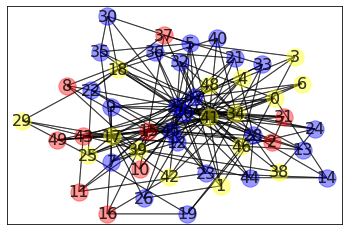

In [ ]:
kd.showgraph()

In [ ]:
#####################
# Número de Acertos #
#####################
acerto = 0
for i in kd.centers.keys():
    target =  targets[0:len_documents][i]
    for j in kd.centers.get(i):
        if targets[0:len_documents][j] == target:
            acerto+=1

print("Percentual de Acerto (%)")
print((float(acerto)/float(len_documents))*100)

Percentual de Acerto (%)
36.0


In [ ]:
# Número de acertos
acerto

18

## Referências

[Representação e Clusterização de documentos usando
grafo direcionado](https://blogdozouza.files.wordpress.com/2020/09/graph_k-dijkstra4doc.pdf)